# Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow, 2nd Edition

## by Aurelien Geron

### Notes by Melis Tekant

## Chapter 5: Support Vector Machines

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import seaborn as sns

Support Vector Machine (SVM) is a popular model that can perform linear/non-linear classification, regression, and outlier detection. It is best suited for small/medium sized data.

Here's an application of SVM on the iris dataset.

In [4]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [9]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

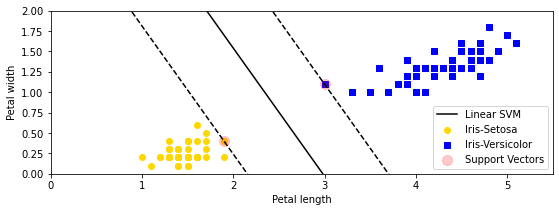

In [138]:
X = iris['data'][:,(2,3)]
y = iris['target']

plt.subplots(figsize=(9,3))
plt.scatter(X[y==0,0],X[y==0,1],c='gold',marker='o',label='Iris-Setosa')
plt.scatter(X[y==1,0],X[y==1,1],c='blue',marker=',',label='Iris-Versicolor')
plt.xlabel('Petal length')
plt.ylabel('Petal width')

idxes = (y==0) | (y==1)
Xval = X[idxes,:]
yval = y[idxes]

from sklearn import svm

svm_fit = svm.SVC(kernel = 'linear', C=1)
svm_fit.fit(Xval,yval)
vecs = svm_fit.support_vectors_
plt.scatter(vecs[:,0],vecs[:,1],c='r',marker='o',s=100,alpha=0.2,label='Support Vectors')

all_as = svm_fit.coef_[0]
inter = svm_fit.intercept_
a = - all_as[0] / all_as[1]
xfit = np.linspace(0.5,4)
yfit = a * xfit - inter / all_as[1]

intersv1 = vecs[0,1] - a * vecs[0,0]
intersv2 = vecs[1,1] - a * vecs[1,0]
ysv1 = a * xfit + intersv1
ysv2 = a* xfit + intersv2

plt.plot(xfit,yfit,'k-',label='Linear SVM')
plt.plot(xfit,ysv1,'k--')
plt.plot(xfit,ysv2,'k--')
plt.xlim(0,5.5)
plt.ylim(0,2)
plt.legend();



SVM with a linear kernel is used in the example above, but for faster computation LinearSVM can be used. 

The SVM classifier fit the widest possible 'street' (area between dashed lines) between the classes (large margin classification). The instances highlighted in red above are called support vectors. Any new instances outside the dashed boundary will not affect the decision boundary. 

This method is sensitive to feature scales, so the scikit StandardScaler should be used. 

Hard margin classification mandates that all instances lie off the street and on one side of the boundary. This method mandates that the data be linearly separable and that no outliers exist. To overcome these strict requirements, we can use a more flexible model, soft margin classification, in which the street is maximized while margin violations are minimized. This is controlled by the C hyperparameter, with smaller leading to wider street / more margin violations. 

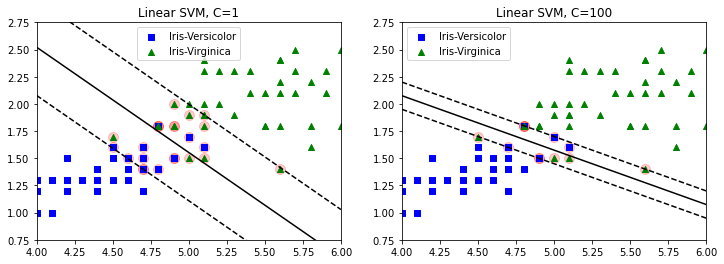

In [187]:
idxes = (y==2) | (y==1)
Xval = X[idxes,:]
yval = y[idxes]

plt.subplots(figsize=(12,4))
svm_fit = svm.SVC(kernel = 'linear', C=1)
svm_fit.fit(Xval,yval)
vecs = svm_fit.support_vectors_
plt.subplot(1,2,1)
plt.scatter(vecs[:,0],vecs[:,1],c='r',marker='o',s=100,alpha=0.2)
plt.scatter(Xval[yval==1,0],Xval[yval==1,1],c='b',marker=',',label='Iris-Versicolor')
plt.scatter(Xval[yval==2,0],Xval[yval==2,1],c='g',marker='^',label='Iris-Virginica')

all_as = svm_fit.coef_[0]
inter = svm_fit.intercept_
a = - all_as[0] / all_as[1]
xfit = np.linspace(4,6)
yfit = a * xfit - inter / all_as[1]

intersv1 = vecs[0,1] - a * vecs[0,0]
intersv2 = - 2 * inter / all_as[1] - intersv1
ysv1 = a * xfit + intersv1
ysv2 = a* xfit + intersv2

plt.plot(xfit,yfit,'k-')
plt.plot(xfit,ysv1,'k--')
plt.plot(xfit,ysv2,'k--')
plt.xlim(4,6)
plt.ylim(0.75,2.75)
plt.title('Linear SVM, C=1')
plt.legend()

svm_fit = svm.SVC(kernel = 'linear', C=100)
svm_fit.fit(Xval,yval)
vecs = svm_fit.support_vectors_
plt.subplot(1,2,2)
plt.scatter(vecs[:,0],vecs[:,1],c='r',marker='o',s=100,alpha=0.2)
plt.scatter(Xval[yval==1,0],Xval[yval==1,1],c='b',marker=',',label='Iris-Versicolor')
plt.scatter(Xval[yval==2,0],Xval[yval==2,1],c='g',marker='^',label='Iris-Virginica')

all_as = svm_fit.coef_[0]
inter = svm_fit.intercept_
a = - all_as[0] / all_as[1]
xfit = np.linspace(4,6)
yfit = a * xfit - inter / all_as[1]

intersv1 = vecs[0,1] - a * vecs[0,0]
intersv2 = - 2 * inter / all_as[1] - intersv1
ysv1 = a * xfit + intersv1
ysv2 = a* xfit + intersv2

plt.plot(xfit,yfit,'k-')
plt.plot(xfit,ysv1,'k--')
plt.plot(xfit,ysv2,'k--')
plt.xlim(4,6)
plt.ylim(0.75,2.75)
plt.title('Linear SVM, C=100')
plt.legend();


The effect of the hyperparameter can be seen in the example above, where for larger C, the street width shrinks, but so does the number of margin violations.

If SVM is overfitting, try regularizing via lowering C.

The SVM classifier can be trained via Stochastic Gradient Descent by SGDClassifier(loss = 'hinge', alpha = 1/(m*C)). More iterations are needed for convergence, but is a good technique for large datasets.

Non-linear SVM:

If the data is not linearly separable, can add polynomial features to make it linearly separable. 

In [289]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([('poly_features',PolynomialFeatures(degree=3)),
                              ('scaler', StandardScaler()),
                             ('svm_clf',svm.LinearSVC(C=10, loss = 'hinge',max_iter=10000))])

X, y = make_moons()
X = X + np.random.normal(0,0.2,np.shape(X))


polynomial_svm_clf.fit(X,y);

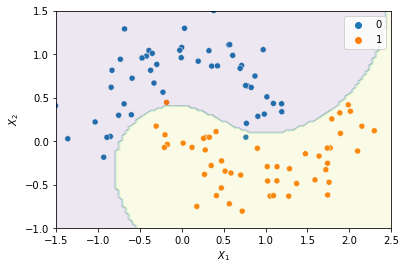

In [294]:
sns.scatterplot(x= X[:,0],y =X[:,1],hue=y)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')

xx = np.linspace(-1.5,2.5,100)
yy = np.linspace(-1,1.5,100)
xgrid,ygrid = np.meshgrid(xx,yy)
grid = np.stack([xgrid.ravel(),ygrid.ravel()],axis=1)
class_grid = polynomial_svm_clf.predict(grid)
class_grid = class_grid.reshape(np.shape(xgrid)) 
plt.contourf(xgrid,ygrid,class_grid,alpha=0.1)
plt.xlim(-1.5,2.5)
plt.ylim(-1,1.5);

Polynomial features will not work for all datasets, and if too many features are added, the model becomes very slow. To overcome this, polynomial kernels can be used, which does not suffer from the issue of slowing down.

In [291]:
poly_kernel_svm_clf_1 = Pipeline([('scaler',StandardScaler()),
                               ('svm_clf',svm.SVC(kernel='poly', degree = 3, coef0 = 1, C = 5))])
poly_kernel_svm_clf_2 = Pipeline([('scaler',StandardScaler()),
                               ('svm_clf',svm.SVC(kernel='poly', degree = 10, coef0 = 100, C = 5))])

poly_kernel_svm_clf_1.fit(X,y)
poly_kernel_svm_clf_2.fit(X,y);


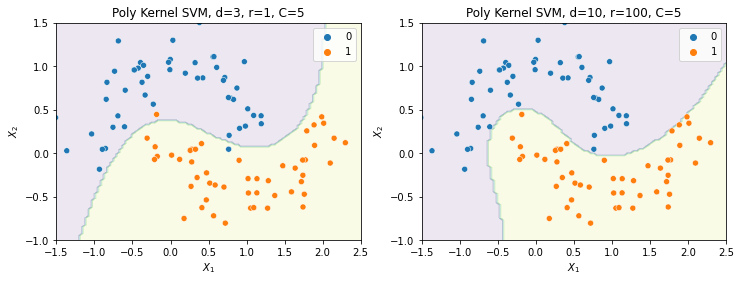

In [295]:
class_grid_1 = poly_kernel_svm_clf_1.predict(grid)
class_grid_1 = class_grid_1.reshape(np.shape(xgrid))

class_grid_2 = poly_kernel_svm_clf_2.predict(grid)
class_grid_2 = class_grid_2.reshape(np.shape(xgrid))

plt.subplots(figsize=(12,4))
plt.subplot(1,2,1)
plt.contourf(xgrid,ygrid,class_grid_1,alpha=0.1)
sns.scatterplot(x= X[:,0],y =X[:,1],hue=y)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title('Poly Kernel SVM, d=3, r=1, C=5')
plt.xlim(-1.5,2.5)
plt.ylim(-1,1.5);

plt.subplot(1,2,2)
plt.contourf(xgrid,ygrid,class_grid_2,alpha=0.1)
sns.scatterplot(x= X[:,0],y =X[:,1],hue=y)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title('Poly Kernel SVM, d=10, r=100, C=5')
plt.xlim(-1.5,2.5)
plt.ylim(-1,1.5);

To find the optimal hyperparameters, use grid search (first course, then fine). 

Another method for nonlinear problems is adding features via a similarity function, e.g. Gaussian Radial Basis Function (Gaussian RBF): $ \phi_\gamma (x,\ell) = e^{-\gamma ||x-\ell||^2}$. Gaussian RBF places a bell-shaped curve around landmarks of choice, varying from 1 at the landmark, to 0, infinitely far from the landmark.

This is the most commonly used kernel, but others may be used in specific instances. For example, string kernels, such as string subsequence kernel or those based on Levenhstein distance, may be used for classifying text (e.g. DNA sequences).

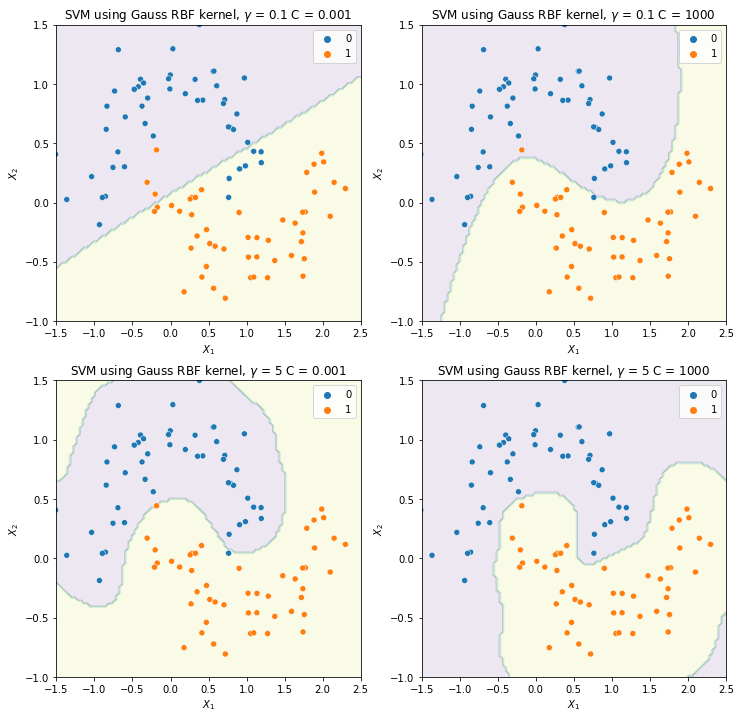

In [306]:
gammas = [0.1,5]
Cs = [0.001,1000]

plt.subplots(figsize=(12,12))
count = 0

for gamma in gammas:
    for C in Cs:
        count += 1
        plt.subplot(2,2,count)
        rbf_kernel_svm_clf = Pipeline([('scaler',StandardScaler()),
                              ('svm_clf',svm.SVC(kernel = 'rbf', gamma = gamma, C = C))])
        rbf_kernel_svm_clf.fit(X,y);
        class_grid = rbf_kernel_svm_clf.predict(grid)
        class_grid = class_grid.reshape(np.shape(xgrid))
        plt.contourf(xgrid,ygrid,class_grid,alpha=0.1)
        sns.scatterplot(x= X[:,0],y =X[:,1],hue=y)
        plt.xlabel('$X_1$')
        plt.ylabel('$X_2$')
        plt.title('SVM using Gauss RBF kernel, $\\gamma$ = '+ str(gamma)+  ' C = '+ str(C))        
        plt.xlim(-1.5,2.5)
        plt.ylim(-1,1.5);




SVM Regression:

SVM also supports linear and nonlinear regression in addition to classification. In this method, the number of instances within the street is maximized and margin violations are minimized. The 'margin' hyperparameter $\epsilon$ controls the width of the street. 

Noisy linear and non-linear datasets are fitted below using SVM regression.

In [411]:
scale = StandardScaler()
X = np.random.uniform(-2,2,100)
Xscale = scale.fit_transform(X.reshape(-1,1))

ylin = 2 * X + np.random.normal(0,1,np.shape(X))
yquad = 2 * X**2 + ylin
yquad = (yquad)/np.std(yquad)

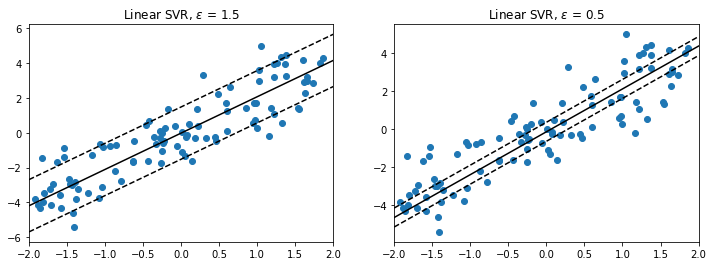

In [412]:
from sklearn.svm import LinearSVR

svm_lin = LinearSVR(epsilon = 1.5)
svm_lin.fit(Xscale,ylin)
a = svm_lin.coef_
b = svm_lin.intercept_
xline = np.linspace(-2,2,100)

svm_lin_2 = LinearSVR(epsilon = 0.5)
svm_lin_2.fit(Xscale,ylin)
a2 = svm_lin_2.coef_
b2 = svm_lin_2.intercept_

plt.subplots(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(X,ylin)
plt.plot(xline,a * xline + b,'k')
plt.plot(xline,a * xline + b - 1.5,'k--')
plt.plot(xline,a * xline + b + 1.5,'k--')
plt.xlim(-2,2)
plt.title('Linear SVR, $\\epsilon$ = 1.5')

plt.subplot(1,2,2)
plt.scatter(X,ylin)
plt.plot(xline,a2 * xline + b2,'k')
plt.title('Linear SVR, $\\epsilon$ = 0.5')
plt.plot(xline,a2 * xline + b2 - 0.5,'k--')
plt.plot(xline,a2 * xline + b2 + 0.5,'k--')
plt.xlim(-2,2);


In [413]:
from sklearn.preprocessing import PolynomialFeatures

polyfeats = PolynomialFeatures(degree = 2)
Xpoly_scale = polyfeats.fit_transform(Xscale)
eps = 0.5

poly_svr_1 = LinearSVR(epsilon = eps, C = 100 ,max_iter = 100000)
poly_svr_2 = LinearSVR(epsilon = eps, C = 0.01 ,max_iter = 100000)
poly_svr_1.fit(Xpoly_scale,yquad)
poly_svr_2.fit(Xpoly_scale,yquad);

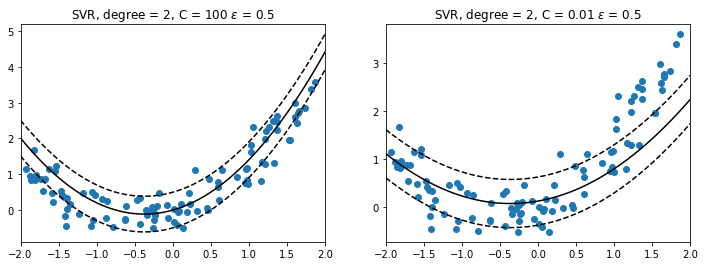

In [415]:
a = poly_svr_1.coef_
a2 = poly_svr_2.coef_

plt.subplots(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(X,yquad)
plt.plot(xline,a[2] * xline**2 + a[1] * xline + a[0],'k')
plt.plot(xline,a[2] * xline**2 + a[1] * xline + a[0] - eps,'k--')
plt.plot(xline,a[2] * xline**2 + a[1] * xline + a[0] + eps,'k--')
plt.xlim(-2,2)
plt.title('SVR, degree = 2, C = 100 $\\epsilon$ = '+ str(eps))

plt.subplot(1,2,2)
plt.scatter(X,yquad)
plt.plot(xline,a2[2] * xline**2 + a2[1] * xline + a2[0],'k')
plt.plot(xline,a2[2] * xline**2 + a2[1] * xline + a2[0] - eps,'k--')
plt.plot(xline,a2[2] * xline**2 + a2[1] * xline + a2[0] + eps,'k--')
plt.xlim(-2,2)
plt.title('SVR, degree = 2, C = 0.01 $\\epsilon$ = '+ str(eps));


The hyperparameter C above tunes the amount of regularization.